In [2]:
import rpy2
%load_ext rpy2.ipython
%R library(lme4)
%R library(sjPlot)
%R library(ggplot2)
%R library(readr)
%R library(afex)

import ast
import os
import sys
import math
import pandas as pd
from joblib import Parallel, delayed
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as ptch
import multiprocessing
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy.stats import norm
from scipy.signal import fftconvolve
import pickle
import datetime
from statistics import mean
import brewer2mpl as b2mpl

/Users/alicexue/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/Users/alicexue/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Learn more about sjPlot with 'browseVignettes("sjPlot")'.

  warnings.warn(x, RRuntimeWarning)
/Users/alicexue/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: emmeans

  warnings.warn(x, RRuntimeWarning)
/Users/alicexue/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: NOTE: As of emmeans versions > 1.2.3,
      The 'cld' function will be deprecated in favor of 'CLD'.
      You may use 'cld' only if you have package:multcomp attached.

  warnings.warn(x, RRuntimeWarning)
/Users/alicexue/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ************
Welcome to afex. For supp

In [3]:
sample1_food = pd.read_csv('../../MDMRTS/analysis/output/food_zscoredratings.csv')
sample2_food = pd.read_csv('./output/food_zscoredratings.csv')
sample3_food = pd.read_csv('../../MDMRTS_sample2/analysis/output/food_zscoredratings.csv')

In [4]:
sample1_food.columns

Index([u'Unnamed: 0', u'subjid', u'deltaval', u'ImageLeft', u'ImageRight',
       u'bidLeft', u'bidRight', u'RT', u'sceneStimulusStatus', u'choseright'],
      dtype='object')

In [5]:
sample2_food.columns

Index([u'Unnamed: 0', u'subjid', u'deltaval', u'ImageLeft', u'ImageRight',
       u'bidLeft', u'bidRight', u'RT', u'sceneStimulusStatus', u'ISI',
       u'choseright'],
      dtype='object')

In [6]:
sample2_food=sample2_food.loc[sample2_food['ISI']==0.0]

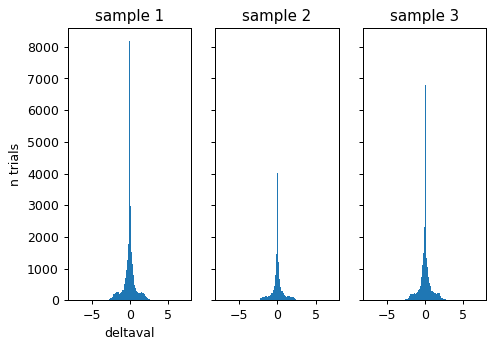

In [9]:
plt.rcParams['figure.dpi'] = 90
fig, axs=plt.subplots(1,3, sharey=True, sharex=True)
axs[0].hist(sample1_food['deltaval'],bins=100)
axs[0].set_title('sample 1')
axs[1].hist(sample2_food['deltaval'],bins=100)
axs[1].set_title('sample 2')
axs[2].hist(sample3_food['deltaval'],bins=100)
axs[2].set_title('sample 3')
axs[0].set_ylabel('n trials')
axs[0].set_xlabel('deltaval')
plt.show()

/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


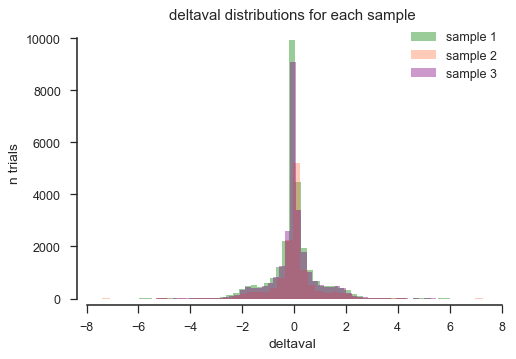

In [10]:
plt.rcParams['figure.dpi'] = 90
sns.set(style="ticks")
fig=plt.figure(1)
sns.distplot(sample1_food['deltaval'], kde=False, color="green", kde_kws={"shade": True}, label='sample 1')
sns.distplot(sample2_food['deltaval'], kde=False, color="coral", kde_kws={"shade": True}, label='sample 2')
sns.distplot(sample3_food['deltaval'], kde=False, color="purple", kde_kws={"shade": True}, label='sample 3')
plt.ylabel('n trials')
plt.xlabel('deltaval')
plt.title('deltaval distributions for each sample')
sns.despine(fig=fig, offset=5, trim=True, top=True, right=True)
plt.legend(borderaxespad=0)
plt.show()

In [11]:
stats.ttest_ind(sample1_food['deltaval'], sample2_food['deltaval'])

Ttest_indResult(statistic=-1.2718086854187032, pvalue=0.20344843211476388)

In [12]:
stats.ttest_ind(sample1_food['deltaval'], sample3_food['deltaval'])

Ttest_indResult(statistic=-1.7918390099721442, pvalue=0.07316433669474487)

In [13]:
foods=np.unique(list(sample1_food['ImageLeft'].values)+list(sample1_food['ImageRight'].values))

In [14]:
food1_ratings1=sample1_food[['subjid','ImageLeft','bidLeft']]
food1_ratings1.columns=['subjid','Image','Bid']
food1_ratings2=sample1_food[['subjid','ImageRight','bidRight']]
food1_ratings2.columns=['subjid','Image','Bid']
food1_ratings_concat=pd.concat([food1_ratings1,food1_ratings2],sort=True)
food1_ratings=food1_ratings_concat.groupby(['subjid','Image']).mean().reset_index()
# can take mean because bid for each image for each participant will be the same

food2_ratings1=sample2_food[['subjid','ImageLeft','bidLeft']]
food2_ratings1.columns=['subjid','Image','Bid']
food2_ratings2=sample2_food[['subjid','ImageRight','bidRight']]
food2_ratings2.columns=['subjid','Image','Bid']
food2_ratings_concat=pd.concat([food2_ratings1,food2_ratings2],sort=True)
food2_ratings=food2_ratings_concat.groupby(['subjid','Image']).mean().reset_index()

food3_ratings1=sample3_food[['subjid','ImageLeft','bidLeft']]
food3_ratings1.columns=['subjid','Image','Bid']
food3_ratings2=sample3_food[['subjid','ImageRight','bidRight']]
food3_ratings2.columns=['subjid','Image','Bid']
food3_ratings_concat=pd.concat([food3_ratings1,food3_ratings2],sort=True)
food3_ratings=food3_ratings_concat.groupby(['subjid','Image']).mean().reset_index()

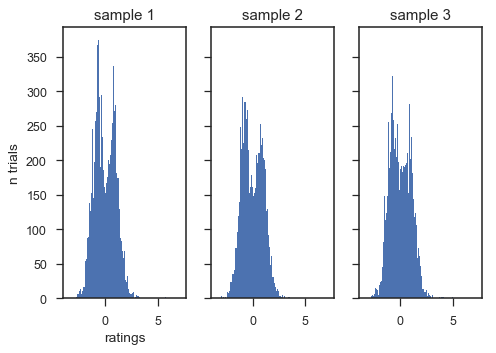

In [15]:
plt.rcParams['figure.dpi'] = 90
fig, axs=plt.subplots(1,3, sharey=True, sharex=True)
axs[0].hist(food1_ratings['Bid'],bins=100)
axs[0].set_title('sample 1')
axs[1].hist(food2_ratings['Bid'],bins=100)
axs[1].set_title('sample 2')
axs[2].hist(food3_ratings['Bid'],bins=100)
axs[2].set_title('sample 3')
axs[0].set_ylabel('n trials')
axs[0].set_xlabel('ratings')
plt.show()

/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


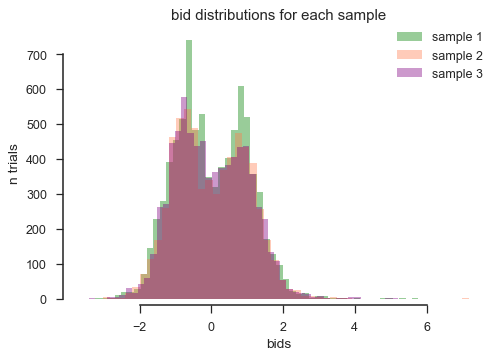

In [16]:
plt.rcParams['figure.dpi'] = 90
sns.set(style="ticks")
fig=plt.figure(1)
sns.distplot(food1_ratings['Bid'], kde=False, color="green", label='sample 1')
sns.distplot(food2_ratings['Bid'], kde=False, color="coral", label='sample 2')
sns.distplot(food3_ratings['Bid'], kde=False, color="purple", label='sample 3')
plt.ylabel('n trials')
plt.xlabel('bids')
plt.title('bid distributions for each sample')
sns.despine(fig=fig, offset=5, trim=True, top=True, right=True)
plt.legend(borderaxespad=0)
plt.show()

In [17]:
stats.ttest_ind(food1_ratings['Bid'], food2_ratings['Bid'])

Ttest_indResult(statistic=-0.06187443432303518, pvalue=0.9506636782658737)

In [18]:
stats.ttest_ind(food1_ratings['Bid'], food3_ratings['Bid'])

Ttest_indResult(statistic=-0.0078860319642956, pvalue=0.9937080214143721)

In [19]:
# get accurate choices
sample1_food['accuracy']=((sample1_food['deltaval']>0) & (sample1_food['choseright'])) | ((sample1_food['deltaval']<0) & (~sample1_food['choseright']))
sample1_perf=sample1_food.groupby(['subjid'])['accuracy','RT'].mean().reset_index()

In [20]:
# get accurate choices
sample2_food['accuracy']=((sample2_food['deltaval']>0) & (sample2_food['choseright'])) | ((sample2_food['deltaval']<0) & (~sample2_food['choseright']))
sample2_perf=sample2_food.groupby(['subjid'])['accuracy','RT'].mean().reset_index()

In [21]:
# get accurate choices
sample3_food['accuracy']=((sample3_food['deltaval']>0) & (sample3_food['choseright'])) | ((sample3_food['deltaval']<0) & (~sample3_food['choseright']))
sample3_perf=sample3_food.groupby(['subjid'])['accuracy','RT'].mean().reset_index()

In [22]:
stats.ttest_ind(sample1_perf['accuracy'], sample2_perf['accuracy'])

Ttest_indResult(statistic=-1.8111949507873273, pvalue=0.07177783037518679)

In [23]:
stats.ttest_ind(sample1_perf['accuracy'], sample3_perf['accuracy'])

Ttest_indResult(statistic=-1.820832743087487, pvalue=0.0701571988086002)

In [24]:
stats.ttest_ind(sample1_perf['RT'], sample2_perf['RT'])

Ttest_indResult(statistic=-4.7738142735220315, pvalue=3.7296749568646934e-06)

In [25]:
stats.ttest_ind(sample1_perf['RT'], sample3_perf['RT'])

Ttest_indResult(statistic=-1.0683442360384425, pvalue=0.28667928962278794)

In [18]:
sample1_food['sample']=1
sample2_food['sample']=2
food = pd.concat([sample1_food,sample2_food],sort=True)

### 2 way interaction between deltaval & sample on choice accuracy

In [23]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 52852.3  52912.5 -26419.1  52838.3    40346 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9374 -1.2027  0.6862  0.7797  1.6269 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 subjid (Intercept) 0.09357  0.3059        
        deltaval    0.01180  0.1086   -0.03
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.39840    0.07630   5.221 1.78e-07 ***
deltaval        -0.01723    0.04632  -0.372   0.7099    
sample           0.08608    0.05094   1.690   0.0911 .  
deltaval:sample  0.01527    0.03303   0.462   0.6439    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr

### 2 way interaction between deltaval & sample on RT

In [35]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample + (absdeltaval | subjid)
   Data: food

REML criterion at convergence: 9353.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1574 -0.6650 -0.0630  0.6024  4.8359 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.04901  0.22138       
          absdeltaval 0.00203  0.04505  -0.62
 Residual             0.07185  0.26805       
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          6.801295   0.050605 179.690000 134.401  < 2e-16 ***
absdeltaval         -0.048781   0.012096 163.960000  -4.033 8.43e-05 ***
sample               0.156321   0.033264 180.360000   4.699 5.16e-06 ***
absdeltaval:sample  -0.009923   0.008205 186.130000  -1.209    0.228    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Cor

### 2 way interaction between deltaval & sample on choosing right

In [28]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 48095.7  48156.0 -24040.9  48081.7    40346 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-18.7668  -0.9209   0.0449   0.9216  15.1729 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 subjid (Intercept) 0.03384  0.1840        
        deltaval    0.48099  0.6935   -0.02
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.06486    0.05335   1.216   0.2241    
deltaval         1.30711    0.17259   7.573 3.64e-14 ***
sample          -0.04106    0.03632  -1.131   0.2581    
deltaval:sample  0.19762    0.11592   1.705   0.0882 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
     

### 3 way interaction between deltaval, context, & sample on choice accuracy

In [29]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 52859.4  52954.1 -26418.7  52837.4    40342 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9377 -1.2047  0.6868  0.7806  1.6577 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 subjid (Intercept) 0.09359  0.3059        
        deltaval    0.01179  0.1086   -0.03
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.382894   0.082413   4.646 3.38e-06
deltaval                                 -0.021257   0.060050  -0.354   0.7233
sample                                    0.092753   0.055675   1.666   0.0957
sceneStimulusStatusnovel                  0.030991   0.0

### 3 way interaction between deltaval, context, & sample on choosing right

In [188]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 48097.7  48192.4 -24037.9  48075.7    40342 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-19.9290  -0.9211   0.0455   0.9207  15.8642 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 subjid (Intercept) 0.03382  0.1839        
        deltaval    0.48060  0.6933   -0.02
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.10397    0.06263   1.660   0.0969
deltaval                                  1.17862    0.18288   6.445 1.16e-10
sample                                   -0.06547    0.04335  -1.510   0.1310
sceneStimulusStatusnovel                 -0.0791

### 3 way interaction between deltaval, context, & sample on RT

In [37]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval |  
    subjid)
   Data: food

REML criterion at convergence: 9374.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1615 -0.6668 -0.0631  0.6039  4.8433 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.049014 0.22139       
          absdeltaval 0.002024 0.04499  -0.62
 Residual             0.071833 0.26802       
Number of obs: 40353, groups:  subjid, 182

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  6.788e+00  5.085e-02  1.830e+02
absdeltaval                                 -3.724e-02  1.356e-02  2.590e+02
sample                                       1.624e-01  3.346e-02  1.850e+02
sceneStimulusStatusnovel                     2.694e-02  1.008e-02  4.006e+04
absdeltaval:sample     

### Effect of sample on choice slopes

In [35]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
cf=coef(foodchmod)

subs=unique(food$subjid)

slopes <- list()
slopes$subjid=subs
slopes$slope=cf[[1]]$deltaval

i=1
sub_sample <- list()
for (sub in subs) {
    if (startsWith(sub,'MDMRTST')) {
        sub_sample[i]=2
    } else {
        sub_sample[i]=1
    }
    i=i+1
}
slopes$sample=unlist(sub_sample)

slopemod=lm(slope ~ sample, data=slopes)
print(summary(slopemod))



Call:
lm(formula = slope ~ sample, data = slopes)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93731 -0.40041 -0.07442  0.32219  2.11598 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.29261    0.14204   9.100   <2e-16 ***
sample      -0.01416    0.09328  -0.152    0.879    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6246 on 180 degrees of freedom
Multiple R-squared:  0.0001281,	Adjusted R-squared:  -0.005427 
F-statistic: 0.02305 on 1 and 180 DF,  p-value: 0.8795



### Effect of sample on RT slopes

In [38]:
%%R -i food

food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample + (absdeltaval|subjid), data=food)
cf=coef(foodrtmod)

subs=unique(food$subjid)

slopes <- list()
slopes$subjid=subs
slopes$slope=cf[[1]]$absdeltaval

i=1
sub_sample <- list()
for (sub in subs) {
    if (startsWith(sub,'MDMRTST')) {
        sub_sample[i]=2
    } else {
        sub_sample[i]=1
    }
    i=i+1
}
slopes$sample=unlist(sub_sample)

slopemod=lm(slope ~ sample, data=slopes)
print(summary(slopemod))


Call:
lm(formula = slope ~ sample, data = slopes)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148776 -0.020373  0.003757  0.026177  0.104387 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.878e-02  8.765e-03  -5.565 9.36e-08 ***
sample      -1.991e-12  5.756e-03   0.000        1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03854 on 180 degrees of freedom
Multiple R-squared:  6.649e-22,	Adjusted R-squared:  -0.005556 
F-statistic: 1.197e-19 on 1 and 180 DF,  p-value: 1



In [49]:
food.groupby(['sample'])['RT'].mean()

sample
1    1140.909793
3    1124.211392
Name: RT, dtype: float64

In [50]:
food.groupby(['sample'])['RT'].median()

sample
1    1057.0
3    1048.0
Name: RT, dtype: float64

In [21]:
sample1_food['sample']=1
sample2_food['sample']=2
sample3_food['sample']=3
food = pd.concat([sample1_food,sample2_food,sample3_food],sort=True)

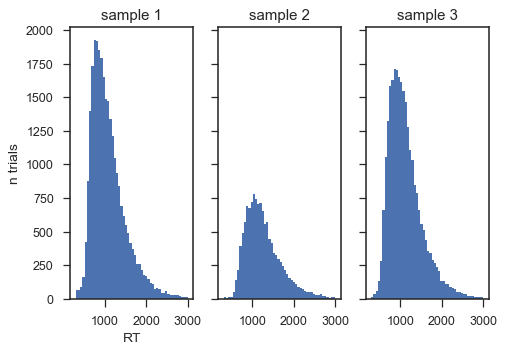

In [23]:
plt.rcParams['figure.dpi'] = 90
fig, axs=plt.subplots(1,3, sharey=True, sharex=True)
axs[0].hist(food.loc[food['sample']==1]['RT'],bins=50)
axs[0].set_title('sample 1')
axs[1].hist(food.loc[food['sample']==2]['RT'],bins=50)
axs[1].set_title('sample 2')
axs[2].hist(food.loc[food['sample']==3]['RT'],bins=50)
axs[2].set_title('sample 3')
axs[0].set_ylabel('n trials')
axs[0].set_xlabel('RT')
plt.show()

/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alicexue/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


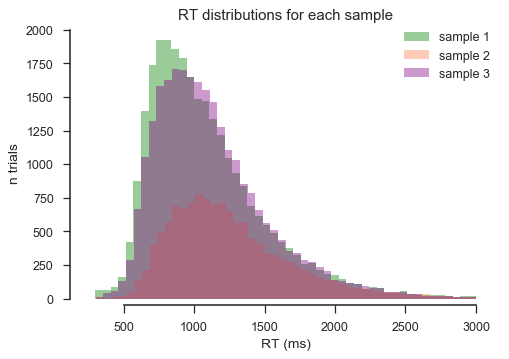

In [24]:
plt.rcParams['figure.dpi'] = 90
sns.set(style="ticks")
fig=plt.figure(1)
sns.distplot(food.loc[food['sample']==1]['RT'], kde=False, color="green", kde_kws={"shade": True}, label='sample 1')
sns.distplot(food.loc[food['sample']==2]['RT'], kde=False, color="coral", kde_kws={"shade": True}, label='sample 2')
sns.distplot(food.loc[food['sample']==3]['RT'], kde=False, color="purple", kde_kws={"shade": True}, label='sample 3')
plt.ylabel('n trials')
plt.xlabel('RT (ms)')
plt.title('RT distributions for each sample')
sns.despine(fig=fig, offset=5, trim=True, top=True, right=True)
plt.legend(borderaxespad=0)
plt.show()

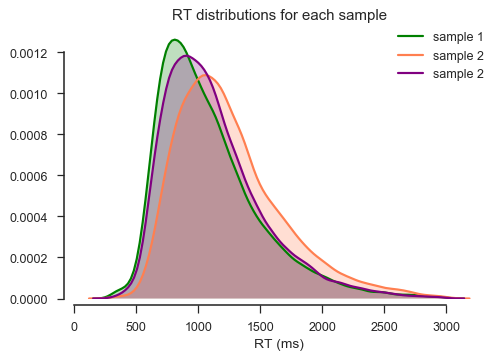

In [25]:
plt.rcParams['figure.dpi'] = 90
sns.set(style="ticks")
fig=plt.figure(1)
sns.distplot(food.loc[food['sample']==1]['RT'], hist=False, kde=True, color="green", kde_kws={"shade": True}, label='sample 1')
sns.distplot(food.loc[food['sample']==2]['RT'], hist=False, kde=True, color="coral", kde_kws={"shade": True}, label='sample 2')
sns.distplot(food.loc[food['sample']==3]['RT'], hist=False, kde=True, color="purple", kde_kws={"shade": True}, label='sample 2')
plt.xlabel('RT (ms)')
plt.title('RT distributions for each sample')
sns.despine(fig=fig, offset=5, trim=True, top=True, right=True)
plt.legend(borderaxespad=0)
plt.show()

In [26]:
food['logRT'] = food['RT'].apply(math.log)

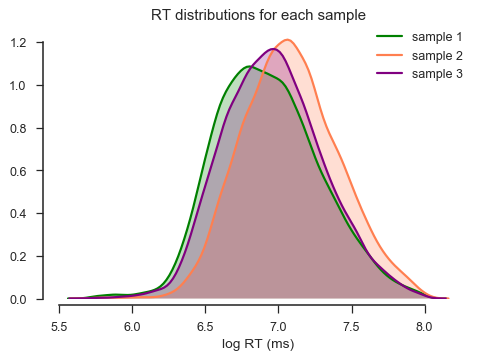

In [27]:
plt.rcParams['figure.dpi'] = 90
sns.set(style="ticks")
fig=plt.figure(1)
sns.distplot(food.loc[food['sample']==1]['logRT'], hist=False, kde=True, color="green", kde_kws={"shade": True}, label='sample 1')
sns.distplot(food.loc[food['sample']==2]['logRT'], hist=False, kde=True, color="coral", kde_kws={"shade": True}, label='sample 2')
sns.distplot(food.loc[food['sample']==3]['logRT'], hist=False, kde=True, color="purple", kde_kws={"shade": True}, label='sample 3')
plt.xlabel('log RT (ms)')
plt.title('RT distributions for each sample')
sns.despine(fig=fig, offset=5, trim=True, top=True, right=True)
plt.legend(borderaxespad=0)
plt.show()

### Compare 2 samples of MDMRTS 

sample 1 is first sample of MDMRTS, sample 3 is second sample of MDMRTS

sample 2 is timed version - just 0s ISI

(the sample numbers are based on when they were collected)

In [27]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 70645.9  70708.2 -35316.0  70631.9    54171 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9713 -1.1962  0.6768  0.7725  1.7204 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.1060   0.3256       
        deltaval    0.0103   0.1015   0.12
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.440108   0.054900   8.017 1.09e-15 ***
deltaval         0.006045   0.029083   0.208   0.8353    
sample           0.044685   0.024856   1.798   0.0722 .  
deltaval:sample -0.006359   0.013167  -0.483   0.6291    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (In

In [29]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample + (absdeltaval | subjid)
   Data: food

REML criterion at convergence: 9763.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6225 -0.6675 -0.0635  0.6025  5.5507 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.057061 0.23887       
          absdeltaval 0.002207 0.04698  -0.73
 Residual             0.068463 0.26165       
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          6.934835   0.037650 195.860000 184.190  < 2e-16 ***
absdeltaval         -0.053999   0.008358 187.880000  -6.461 8.71e-10 ***
sample               0.022728   0.017046 195.870000   1.333    0.184    
absdeltaval:sample  -0.004605   0.003787 188.510000  -1.216    0.226    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Cor

In [30]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 64186.3  64248.6 -32086.1  64172.3    54171 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-19.0618  -0.9000  -0.0684   0.9117  16.1831 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.04437  0.2106       
        deltaval    0.54532  0.7385   0.09
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.06188    0.03926   1.576   0.1150    
deltaval         1.47646    0.12392  11.915   <2e-16 ***
sample          -0.03719    0.01777  -2.092   0.0364 *  
deltaval:sample  0.03553    0.05605   0.634   0.5262    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        

In [31]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 70648.2  70746.1 -35313.1  70626.2    54167 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9752 -1.1966  0.6774  0.7728  1.7462 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.10599  0.3256       
        deltaval    0.01023  0.1011   0.11
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.414929   0.058357   7.110 1.16e-12
deltaval                                  0.007023   0.037275   0.188   0.8505
sample                                    0.061034   0.026442   2.308   0.0210
sceneStimulusStatusnovel                  0.050342   0.0397

In [32]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 64186.2  64284.1 -32082.1  64164.2    54167 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-20.2389  -0.8996  -0.0673   0.9117  16.9322 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.04437  0.2106       
        deltaval    0.54548  0.7386   0.09
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.08938    0.04448   2.010   0.0445
deltaval                                  1.39244    0.12904  10.791   <2e-16
sample                                   -0.04987    0.02017  -2.473   0.0134
sceneStimulusStatusnovel                 -0.05546  

In [34]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval |  
    subjid)
   Data: food

REML criterion at convergence: 9781.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6277 -0.6697 -0.0645  0.6030  5.5304 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.057065 0.23888       
          absdeltaval 0.002202 0.04692  -0.73
 Residual             0.068442 0.26161       
Number of obs: 54178, groups:  subjid, 198

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  6.924e+00  3.778e-02  1.990e+02
absdeltaval                                 -4.132e-02  9.142e-03  2.690e+02
sample                                       2.598e-02  1.711e-02  1.990e+02
sceneStimulusStatusnovel                     2.138e-02  6.294e-03  5.391e+04
absdeltaval:sample     

### Compare all three samples

sample 1: first sample of MDMRTS

sample 2: timed version of MDMRTS - just 0s ISI data

sample 3: second sample of MDMRTS

In [64]:
sample1_food['sample']=1
sample2_food['sample']=2
sample3_food['sample']=3
food = pd.concat([sample1_food,sample2_food,sample3_food],sort=True)

In [65]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 87092.2  87155.9 -43539.1  87078.2    66764 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9534 -1.2066  0.6792  0.7704  1.6658 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.092471 0.30409      
        deltaval    0.008704 0.09329  0.13
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.450392   0.050497   8.919   <2e-16 ***
deltaval         0.010100   0.027874   0.362    0.717    
sample           0.044966   0.023434   1.919    0.055 .  
deltaval:sample -0.006286   0.012839  -0.490    0.624    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (In

In [67]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample + (absdeltaval | subjid)
   Data: food

REML criterion at convergence: 13475.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5644 -0.6672 -0.0596  0.6061  5.4973 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.053708 0.23175       
          absdeltaval 0.002038 0.04514  -0.68
 Residual             0.069828 0.26425       
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                     Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          6.971155   0.035578 275.300000 195.940  < 2e-16 ***
absdeltaval         -0.056112   0.007938 246.440000  -7.069  1.6e-11 ***
sample               0.023868   0.016540 275.210000   1.443     0.15    
absdeltaval:sample  -0.004623   0.003680 244.340000  -1.256     0.21    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Co

In [68]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample + (deltaval | subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 79240.0  79303.8 -39613.0  79226.0    66764 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-19.0843  -0.9060  -0.0705   0.9189  15.7322 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.03788  0.1946       
        deltaval    0.50521  0.7108   0.09
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.06115    0.03632   1.684   0.0922 .  
deltaval         1.51196    0.11706  12.917   <2e-16 ***
sample          -0.03729    0.01682  -2.217   0.0266 *  
deltaval:sample  0.03673    0.05423   0.677   0.4982    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        

In [69]:
%%R -i food

foodaccmod=glmer(accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodaccmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: accuracy ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 87094.5  87194.7 -43536.3  87072.5    66760 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9523 -1.2081  0.6800  0.7705  1.6912 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.092498 0.30414      
        deltaval    0.008651 0.09301  0.12
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.423525   0.054148   7.822 5.21e-15
deltaval                                  0.011485   0.036108   0.318   0.7504
sample                                    0.061236   0.025120   2.438   0.0148
sceneStimulusStatusnovel                  0.053757   0.0390

In [70]:
%%R -i food

foodchmod=glmer(choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval|subjid), family='binomial', data=food)
print(summary(foodchmod))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choseright ~ deltaval * sample * sceneStimulusStatus + (deltaval |  
    subjid)
   Data: food

     AIC      BIC   logLik deviance df.resid 
 79239.9  79340.1 -39609.0  79217.9    66760 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-20.0935  -0.9056  -0.0697   0.9187  16.3540 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 subjid (Intercept) 0.03787  0.1946       
        deltaval    0.50536  0.7109   0.09
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.08673    0.04173   2.078   0.0377
deltaval                                  1.43267    0.12227  11.717   <2e-16
sample                                   -0.05014    0.01933  -2.594   0.0095
sceneStimulusStatusnovel                 -0.05135  

In [71]:
%%R -i food
food$absdeltaval=abs(food$deltaval)
food$logRT=log(food$RT)
foodrtmod=lmer(logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval|subjid), data=food)
print(summary(foodrtmod))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: logRT ~ absdeltaval * sample * sceneStimulusStatus + (absdeltaval |  
    subjid)
   Data: food

REML criterion at convergence: 13496

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5671 -0.6689 -0.0601  0.6073  5.4797 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subjid   (Intercept) 0.053713 0.2318        
          absdeltaval 0.002034 0.0451   -0.68
 Residual             0.069813 0.2642        
Number of obs: 66771, groups:  subjid, 278

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  6.961e+00  3.571e-02  2.800e+02
absdeltaval                                 -4.337e-02  8.755e-03  3.630e+02
sample                                       2.713e-02  1.660e-02  2.790e+02
sceneStimulusStatusnovel                     2.027e-02  6.247e-03  6.638e+04
absdeltaval:sample      